In [1]:
from mb.lang.basic import ModelFactory

/home/malav/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [9]:
## labeler LLM
llm = ModelFactory(model_name="gemini-3.1-pro-preview",model_type='google')

## validator LLM (can be a different model)
validator_llm = ModelFactory(model_name="gemini-3.0-flash",model_type='google')

In [3]:
from mb_rag.agents.get_langsmith import set_langsmith_parameters
import os
from dotenv import load_dotenv
load_dotenv()
set_langsmith_parameters(langsmith_endpoint="https://api.smith.langchain.com",
                        langsmith_project="BB-Labeling-Agent-Project",
                        langsmith_tracing="true")
os.environ["LANGCHAIN_TRACING_V2"] = "true"


In [4]:
from mb.lang.agents.bb_autolabel import create_labeling_agent,LabelingGraph

In [10]:
agent = create_labeling_agent(llm.model, logging=False, langsmith_params=True)
validator = create_labeling_agent(validator_llm.model, logging=False, langsmith_params=True)

In [11]:
graph_agent = LabelingGraph(agent=agent, validator_agent=None)

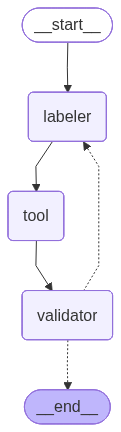

In [12]:
from IPython.display import Image, display
display(Image(graph_agent._build_graph().get_graph(xray=True).draw_mermaid_png()))

In [13]:
graph_agent.run(image_path='../data/IMG_1827.jpg', 
                query="Label the spoon and scambled eggs in the image.",
                temp_image='../data/temp_img.jpg')

{'messages': [{'role': 'agent',
   'content': '{\n  "labeled_objects": [\n    {"label": "spoon", "box": [0.468, 0.813, 0.730, 1.000], "valid": false},\n    {"label": "scambled eggs", "box": [0.183, 0.342, 0.767, 0.648], "valid": false}\n  ]\n}'}],
 'bbox_json': '{"labeled_objects": [{"label": "spoon", "box": [0.468, 0.813, 0.73, 1.0], "valid": true}, {"label": "scambled eggs", "box": [0.183, 0.342, 0.767, 0.648], "valid": true}]}',
 'labeled_objects': [{'label': 'spoon',
   'box': [0.468, 0.813, 0.73, 1.0],
   'valid': True},
  {'label': 'scambled eggs',
   'box': [0.183, 0.342, 0.767, 0.648],
   'valid': True}],
 'temp_bb_img_path': '../data/temp_img.jpg',
 'bb_valid': True,
 'bbox_json_reason': [],
 'query': 'Label the spoon and scambled eggs in the image.',
 'image_path': '../data/IMG_1827.jpg',
 'failed_labels': None}